### Pipeline gerarchica

**PIPELINE - APPROCCIO GERARCHICO**

Contributo algoritmico per semplificare il grafo trovando strutture ripetitive-ricorsive al suo interno.

Procedura:

```
Identificare sottografo motif nel grafo G (figure come la prima iterazione di un frattale)
Collassare il motif in un solo nodo
Aggiornare il peso e il colore degli archi
Riapplicare il procedimento al grafo risultante (nuovo livello)
```

In [1]:
import networkx as nx
from grandiso import find_motifs

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

#### Grafo test di base `G`

In [3]:
# grafo test di base G

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
# nx.draw(G)

#### Sottografo `motif`

In [4]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

In [5]:
# Sottografo motif da trovare nel grafo G: QUADRATO

# motif1 = nx.Graph()
# motif1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
# nx.draw(motif1)

## TODO: definisci una serie di pattern
- singolo nodo
- due nodi e un arco
- triangolo aperto
- quadrato aperto
- combinazioni varie
- stelle
- curve frattali
- insieme di julia

***

La funzione `identify` prende in input un grafo `G` e un sottografo `motif`, chiama la funzione `find_motifs` della libreria grandiso che sostituisce una lista di dizionari in cui ogni dizionario è un `motif` trovato in `G` e converte l'output in lista di uniche liste.

In [6]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    lista2 = [list(d.values()) for d in lista1]
    lista3 = list(set(tuple(sorted(s)) for s in lista2))
    risultato = [list(el) for el in lista3]
    return risultato

***

In [7]:
def comprimi_rinomina():
    livello = 0
    ris = identify(motif, G)
    nodi = list(G.nodes())
    lun = len(nodi)
    lista_temp = nodi[:]
    for x in lista_temp:
        if x in ris[0]:
            lista_temp[x-1] = ris[0][0]
    lista_temp
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, lista_temp))
    mapping = dict(zip(nodi, lista_tuple))
    
    return mapping
    

In [ ]:
# variante per lista_temp
for x in lista_temp:
    if x in ris[0]:
        print(lista_temp[x-1])
        lista_temp[lun-1] = ris[0][0]
lista_temp

In [8]:
mapp = comprimi_rinomina()
mapp

{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 2), 5: (0, 2), 6: (0, 6)}

[(0, 1), (0, 2), (0, 3), (0, 6)]


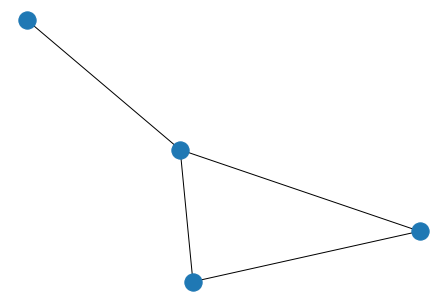

In [9]:
G1 = nx.relabel_nodes(G, mapp)
print(G1.nodes())
nx.draw(G1)

#### Seconda iterazione

In [10]:
def comprimi_rinomina2():
    livello2 = 1
    ris2 = identify(motif, G1)
    ris2  = [val for sublist in ris2 for val in sublist]
    ris2 = [x[1] for x in ris2]
    ris2 = [ris2]
    nodi2 = list(G1.nodes())
    nodi2 = [x[1] for x in nodi2]
    lun2 = len(nodi2)
    lista_temp2 = []
    for x in nodi2:
        if x in ris2[0]:
            lista_temp2.append(ris2[0][0])
        else:
            lista_temp2.append(x)
    liv_list2 = [livello2 for x in range(lun2)]
    lista_tuple2 = list(zip(liv_list2, lista_temp2))
    mapping2 = dict(zip(nodi2, lista_tuple2))
    
    return mapping2


In [ ]:
# tentativo per lista_temp2
a = [1, 2, 3, 6]
b = [2, 3, 6]
c = []
for x in a:
    if x in b:
        c.append(b[0])
        #print(b[0])
    else:
        c.append(x)
        #print(x)
c

In [11]:
mapp2 = comprimi_rinomina2()
mapp2

{1: (1, 1), 2: (1, 2), 3: (1, 2), 6: (1, 2)}

In [12]:
# Rinomino archi del grafo

archi = list(G1.edges())
archi2 = []
for i in archi:
    archi2.append((i[0][1], i[1][1]))
G1 = nx.Graph()
G1.add_edges_from(archi2)
# nx.draw(G1)

[(1, 1), (1, 2)]


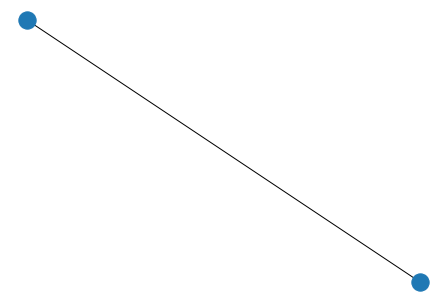

In [13]:
G2 = nx.relabel_nodes(G1, mapp2)
print(G2.nodes())
nx.draw(G2)